# Project: Wrangling and Analyze Data

## Data Gathering

In [114]:
import pandas as pd
import requests
import os
import numpy as np
import functools as ft
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
#read twitter-archive-enhanced with pandas
enhanced_df = pd.read_csv('twitter-archive-enhanced.csv')

In [116]:
enhanced_df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [117]:
list(enhanced_df)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [118]:
# create folder-data if it does not exist
folder_name = 'folder-data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [119]:
# download the image-predictions.tsv file using the python request library     
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [120]:
#read the image_prediction.tsv file using pandas
image_prediction_df=pd.read_csv('folder-data\image-predictions.tsv',sep='\t')

In [121]:
image_prediction_df.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


3. Used the alternative approach to get the (tweet_json.txt) file

In [122]:
# download the tweet-json file using the python request library
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url)
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [123]:
# # import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_1.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)



Changed the extension of the tweet-json.txt to .json to be able to read it using the pandas read_json function

In [124]:
# read with read.json() function
df_json = pd.read_json('tweet.json', lines=True)

In [125]:
df_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [126]:
list(df_json)

['created_at',
 'id',
 'id_str',
 'full_text',
 'truncated',
 'display_text_range',
 'entities',
 'extended_entities',
 'source',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'user',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'lang',
 'retweeted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status']

In [127]:
df_json.lang.value_counts()

en     2336
und       7
in        3
nl        3
eu        1
es        1
tl        1
ro        1
et        1
Name: lang, dtype: int64

Extract the id,retweet_count,favorite_count,lang into a new pandas dataframe

In [128]:
df_jsonNew = df_json[["id","retweet_count","favorite_count","lang"]]

In [129]:
df_jsonNew.head()

,id,retweet_count,favorite_count,lang
0,892420643555336193,8853,39467,en
1,892177421306343426,6514,33819,en
2,891815181378084864,4328,25461,en
3,891689557279858688,8964,42908,en
4,891327558926688256,9774,41048,en


Convert the df_jsonNew dataframe into a csv file for future reference

In [130]:
# Check if new csv file exist or not before saving the newly created dataframe as a csv file
if not os.path.exists('twitter-archive-enhanced-2.csv'):
    df_jsonNew.to_csv('twitter-archive-enhanced-2.csv')

Re-read the twitter-archive-enhanced-2.csv file using pandas

In [131]:
enhanced_df2 = pd.read_csv('twitter-archive-enhanced-2.csv')

In [132]:
enhanced_df2.head()

,Unnamed: 0,id,retweet_count,favorite_count,lang
0,0,892420643555336193,8853,39467,en
1,1,892177421306343426,6514,33819,en
2,2,891815181378084864,4328,25461,en
3,3,891689557279858688,8964,42908,en
4,4,891327558926688256,9774,41048,en


In [133]:
#Drop Unnamed column
enhanced_df2.drop('Unnamed: 0', axis=1, inplace=True)

In [134]:
enhanced_df2.head()

,id,retweet_count,favorite_count,lang
0,892420643555336193,8853,39467,en
1,892177421306343426,6514,33819,en
2,891815181378084864,4328,25461,en
3,891689557279858688,8964,42908,en
4,891327558926688256,9774,41048,en


In [135]:
enhanced_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   int64 
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   lang            2354 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


Now we have all three dataset loaded into our dataframe as
1. enhanced_df
2. enhanced_df2
3. image_prediction_df

## Assessing Data


Acessing the datasets programatically

In [136]:
enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [137]:
enhanced_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   int64 
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   lang            2354 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [138]:
image_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [139]:
enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [140]:
enhanced_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   int64 
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   lang            2354 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [141]:
image_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [142]:
enhanced_df['tweet_id']

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 2356, dtype: int64

In [143]:
enhanced_df['tweet_id'].nunique()

2356

In [144]:
enhanced_df[enhanced_df.tweet_id==891327558926688256]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [145]:
enhanced_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [146]:
enhanced_df.duplicated().sum()

0

In [147]:
enhanced_df['name'].duplicated().sum()

1399

In [148]:
enhanced_df.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [149]:
enhanced_df.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [150]:
enhanced_df.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [151]:
enhanced_df.rating_denominator.sort_values()

313       0
2335      2
516       7
1576     10
1575     10
       ... 
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

In [152]:
enhanced_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [153]:
enhanced_df[enhanced_df.rating_numerator==1776]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [154]:
enhanced_df[enhanced_df.rating_denominator==170]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


In [155]:
enhanced_df2[enhanced_df2.id==891327558926688256]

,id,retweet_count,favorite_count,lang
4,891327558926688256,9774,41048,en


In [156]:
enhanced_df[enhanced_df.tweet_id==860177593139703809]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
165,860177593139703809,NaN,NaN,2017-05-04 17:01:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Ohboyohboyohboyohboyohboyohboyo...,7.616730e+17,4.196984e+09,2016-08-05 21:19:27 +0000,https://twitter.com/dog_rates/status/761672994...,10,10,None,None,None,None,None


In [157]:
list(enhanced_df2)

['id', 'retweet_count', 'favorite_count', 'lang']

In [158]:
enhanced_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   int64 
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   lang            2354 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [159]:
enhanced_df2.lang.value_counts()

en     2336
und       7
in        3
nl        3
eu        1
es        1
tl        1
ro        1
et        1
Name: lang, dtype: int64

In [160]:
enhanced_df2[enhanced_df2.lang=='in']

,id,retweet_count,favorite_count,lang
164,860177593139703809,33421,0,in
868,761672994376806400,33421,55016,in
1664,682697186228989953,397,1440,in


In [161]:
image_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [162]:
image_prediction_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2029,882762694511734784,https://pbs.twimg.com/media/DEAz_HHXsAA-p_z.jpg,1,Labrador_retriever,0.850050,True,Chesapeake_Bay_retriever,0.074257,True,flat-coated_retriever,0.015579,True
1690,815736392542261248,https://pbs.twimg.com/media/C1IT6rVXUAIvwYT.jpg,3,Border_collie,0.548907,True,Cardigan,0.178523,True,collie,0.146351,True
608,680070545539371008,https://pbs.twimg.com/media/CW-dU34WQAANBGy.jpg,1,earthstar,0.127701,False,Shih-Tzu,0.121811,True,bubble,0.117820,False
584,678969228704284672,https://pbs.twimg.com/media/CWwu6OLUkAEo3gq.jpg,1,Labrador_retriever,0.680251,True,Chesapeake_Bay_retriever,0.201697,True,golden_retriever,0.019676,True
1160,734776360183431168,https://pbs.twimg.com/media/CjJzMlBUoAADMLx.jpg,1,Siberian_husky,0.304902,True,Eskimo_dog,0.155147,True,malamute,0.050942,True
1936,860184849394610176,https://pbs.twimg.com/media/C-_9jWWUwAAnwkd.jpg,1,chimpanzee,0.267612,False,gorilla,0.104293,False,orangutan,0.059908,False
601,679777920601223168,https://pbs.twimg.com/media/CW8OYajUMAAPRoF.jpg,1,bloodhound,0.528819,True,bull_mastiff,0.420119,True,French_bulldog,0.009481,True
708,685198997565345792,https://pbs.twimg.com/media/CYJQxvJW8AAkkws.jpg,1,dishwasher,0.888829,False,stove,0.013411,False,Old_English_sheepdog,0.009671,True
1563,793601777308463104,https://pbs.twimg.com/media/CwNwmxvXEAEJ54Z.jpg,1,miniature_pinscher,0.538981,True,Chihuahua,0.217830,True,toy_terrier,0.089149,True
1479,780800785462489090,https://pbs.twimg.com/media/CtX2Kr9XYAAuxrM.jpg,2,Siberian_husky,0.951963,True,Eskimo_dog,0.035346,True,Pembroke,0.008862,True


In [163]:
#Select all rows with dog's prediction been false
image_prediction_df.query('p1_dog==False and p2_dog==False and p3_dog==False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


In [164]:
enhanced_df.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [165]:
enhanced_df2.dtypes

id                 int64
retweet_count      int64
favorite_count     int64
lang              object
dtype: object

In [166]:
image_prediction_df.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [167]:
enhanced_df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [168]:
enhanced_df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [169]:
enhanced_df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [170]:
sum(enhanced_df.duplicated())

0

### Quality issues
1. The in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id  retweeted_status_user_id  and retweeted_status_timestamp columns in the twitter-archive-enhanced dataset have more than 90% of its data been null values
2. Source of tweet embedded in the href tag in the twitter-archive-enhanced dataset.

3. Inconsistent rating_numerator amd rating_denominator values compared to what is in the text column.

4. Incorrect datatype for the ID columns in all 3 dataset 

5. Incorrect datatype for the new rating_numerator and rating_denominator  values 

6. Incorrect datatype for lang column in enhance_df2 dataframe and timestamp in enhance_df 

7. All three predictions in the image_prediction_df dataframe been false

8. Actual rating of each dog

### Tidiness issues
9. Dog stages in 4 columns instead of 1

10. All dataframes form one observation

## Cleaning Data

In [171]:
# Make copies of original pieces of data
enhanced_df_clean = enhanced_df.copy()
enhanced_df2_clean = enhanced_df2.copy()
image_prediction_df_clean = image_prediction_df.copy()

In [172]:
enhanced_df_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [173]:
enhanced_df2_clean.head(2)

,id,retweet_count,favorite_count,lang
0,892420643555336193,8853,39467,en
1,892177421306343426,6514,33819,en


In [174]:
image_prediction_df_clean.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


### Issue #1:

#### Define
Drop the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns 

#### Code

In [175]:
enhanced_df_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [176]:
list(enhanced_df_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

### Issue 2:

#### Define
Strip off href and leave only its content

#### Code

In [177]:
enhanced_df_clean.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [178]:
enhanced_df_clean['source']=enhanced_df_clean['source'].str.replace('<[^<>]*>', '', regex=True)

#### Test

In [179]:
enhanced_df_clean['source']

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
               ...        
2351    Twitter for iPhone
2352    Twitter for iPhone
2353    Twitter for iPhone
2354    Twitter for iPhone
2355    Twitter for iPhone
Name: source, Length: 2356, dtype: object

In [180]:
enhanced_df_clean.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

### Issue: 3

#### Define

Extract new values for rating_numerator and rating_denominator from the text field

#### Code

In [181]:
# Extracting from text field
new_ratings = enhanced_df_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

In [182]:
#Replace column name with rating_numerator_new, rating_denominator_new
new_ratings.columns = ['rating_numerator_new', 'rating_denominator_new']

In [183]:
#Verify the shape of new dataframe
new_ratings.shape

(2356, 2)

In [184]:
#Verify the shape of enhanced_df_clean
enhanced_df_clean.shape

(2356, 12)

Since both dataframes ie. new_ratings and enhanced_df_clean have the same number of columns we can sue the pandas concat function to put the together

In [185]:
enhanced_df_clean=pd.concat([enhanced_df_clean,new_ratings], axis=1)

In [186]:
list(enhanced_df_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'rating_numerator_new',
 'rating_denominator_new']

In [187]:
# Drop the old rating_numerator and rating_denominator columns
enhanced_df_clean.drop(['rating_numerator','rating_denominator'], axis=1, inplace=True)

In [188]:
list(enhanced_df_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'rating_numerator_new',
 'rating_denominator_new']

#### Test

In [189]:
enhanced_df_clean.rating_numerator_new.head(5)

0    13
1    13
2    12
3    13
4    12
Name: rating_numerator_new, dtype: object

In [190]:
enhanced_df_clean.rating_denominator_new.head(5)

0    10
1    10
2    10
3    10
4    10
Name: rating_denominator_new, dtype: object

### Issue: 4

### Define

Convert tweet_id,id to object datatype

#### Code

In [191]:
enhanced_df2_clean['id'] = enhanced_df2_clean.id.astype(str)
enhanced_df_clean['tweet_id'] = enhanced_df_clean.tweet_id.astype(str)
image_prediction_df_clean['tweet_id'] = image_prediction_df_clean.tweet_id.astype(str)

In [192]:
#rename id in enhanced_df_2 to tweet_id to be consistent tweet_id in the other dataframe
enhanced_df2_clean.rename(columns={'id':'tweet_id'}, inplace=True)

#### Test

In [193]:
enhanced_df_clean.dtypes.tweet_id

dtype('O')

In [194]:
enhanced_df2_clean.dtypes.tweet_id

dtype('O')

In [195]:
image_prediction_df_clean.dtypes.tweet_id

dtype('O')

### Issue: 5

#### Define

Change rating_numerator_new and rating_denominator_new to float data type

#### Code

In [196]:
enhanced_df_clean['rating_numerator_new'] = enhanced_df_clean.rating_numerator_new.astype(float)
enhanced_df_clean['rating_denominator_new'] = enhanced_df_clean.rating_denominator_new.astype(float)

#### Test

In [197]:
enhanced_df_clean.dtypes

tweet_id                   object
timestamp                  object
source                     object
text                       object
expanded_urls              object
name                       object
doggo                      object
floofer                    object
pupper                     object
puppo                      object
rating_numerator_new      float64
rating_denominator_new    float64
dtype: object

### Issue: 6

#### Define

Change lang to category datatype and timestamp to date_time datatype

#### Code

In [198]:
enhanced_df2_clean.lang = enhanced_df2_clean.lang.astype('category')
enhanced_df_clean.timestamp = pd.to_datetime(enhanced_df_clean['timestamp'])

#### Test

In [199]:
enhanced_df2_clean.dtypes.lang

CategoricalDtype(categories=['en', 'es', 'et', 'eu', 'in', 'nl', 'ro', 'tl', 'und'], ordered=False)

In [200]:
enhanced_df_clean.dtypes.timestamp

datetime64[ns, UTC]

### Issue: 7

#### Define

Delete rows which returned False from all the three predictions in the image_prediction_df_clean dataframe 

#### Code

In [201]:
indexes = image_prediction_df_clean[ (image_prediction_df_clean['p1_dog'] == False) & (image_prediction_df_clean['p2_dog'] == False) & (image_prediction_df_clean['p3_dog'] == False)].index

In [202]:
image_prediction_df_clean.drop(indexes,inplace=True)

#### Test

In [203]:
image_prediction_df_clean.query('p1_dog==False and p2_dog==False and p3_dog==False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue: 9

### Define

Merge the doggo, floofer, pupper, puppo columns in the enhanced_df_clean table into one column called dog_stage

#### Code

In [204]:
# handle none
enhanced_df_clean.doggo.replace('None', '', inplace=True)
enhanced_df_clean.floofer.replace('None', '', inplace=True)
enhanced_df_clean.pupper.replace('None', '', inplace=True)
enhanced_df_clean.puppo.replace('None', '', inplace=True)

# merge into column
enhanced_df_clean['dog_stage'] = enhanced_df_clean.doggo + enhanced_df_clean.floofer + enhanced_df_clean.pupper + enhanced_df_clean.puppo

# handle multiple stages
enhanced_df_clean.loc[enhanced_df_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
enhanced_df_clean.loc[enhanced_df_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
enhanced_df_clean.loc[enhanced_df_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
enhanced_df_clean.loc[enhanced_df_clean.dog_stage == '', 'dog_stage'] = "Can't Classify"

In [205]:
# Change dog_stage datatype to category
enhanced_df_clean.dog_stage = enhanced_df_clean.dog_stage.astype('category')

In [206]:
# drop the doggo, floofer, pupper and puppo columns
enhanced_df_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

In [207]:
list(enhanced_df_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'name',
 'rating_numerator_new',
 'rating_denominator_new',
 'dog_stage']

#### Test

In [208]:

enhanced_df_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,name,rating_numerator_new,rating_denominator_new,dog_stage
1912,674394782723014656,2015-12-09 01:07:00+00:00,Twitter for iPhone,This is Gary. He's a hide and seek champion. S...,https://twitter.com/dog_rates/status/674394782...,Gary,8.0,10.0,Can't Classify
1687,681579835668455424,2015-12-28 20:57:50+00:00,Twitter for iPhone,This is Apollo. He thought you weren't coming ...,https://twitter.com/dog_rates/status/681579835...,Apollo,8.0,10.0,Can't Classify
1630,684538444857667585,2016-01-06 00:54:18+00:00,Twitter for iPhone,"After watching this video, we've determined th...",https://twitter.com/dog_rates/status/684538444...,None,12.0,10.0,Can't Classify
2033,671744970634719232,2015-12-01 17:37:36+00:00,Twitter for iPhone,Very fit horned dog here. Looks powerful. Not ...,https://twitter.com/dog_rates/status/671744970...,None,6.0,10.0,Can't Classify
39,884876753390489601,2017-07-11 20:47:12+00:00,Twitter for iPhone,This is Lola. It's her first time outside. Mus...,https://twitter.com/dog_rates/status/884876753...,Lola,13.0,10.0,Can't Classify


In [209]:
enhanced_df_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,name,rating_numerator_new,rating_denominator_new,dog_stage
976,750026558547456000,2016-07-04 18:00:41+00:00,TweetDeck,Meet Jax &amp; Jil. Jil is yelling the pledge ...,https://twitter.com/dog_rates/status/750026558...,Jax,10.0,10.0,Can't Classify
2063,671159727754231808,2015-11-30 02:52:03+00:00,Twitter for iPhone,This is Anthony. He just finished up his maste...,https://twitter.com/dog_rates/status/671159727...,Anthony,5.0,10.0,Can't Classify
1321,706310011488698368,2016-03-06 02:46:44+00:00,Twitter for iPhone,Here's a very sleepy pupper. Thinks it's an ai...,https://twitter.com/dog_rates/status/706310011...,None,12.0,10.0,pupper
1834,676121918416756736,2015-12-13 19:30:01+00:00,Vine - Make a Scene,Here we are witnessing a very excited dog. Cle...,https://vine.co/v/iZXg7VpeDAv,None,8.0,10.0,Can't Classify
366,828801551087042563,2017-02-07 03:04:22+00:00,Twitter for iPhone,RT @dog_rates: This is Gus. He likes to be clo...,https://twitter.com/dog_rates/status/810254108...,Gus,12.0,10.0,Can't Classify


In [210]:
enhanced_df_clean.dog_stage.dtypes

CategoricalDtype(categories=['Can't Classify', 'doggo', 'doggo, floofer', 'doggo, pupper',
                  'doggo, puppo', 'floofer', 'pupper', 'puppo'],
, ordered=False)

### Issue: 8

#### Define

Calculate actual rating by dividing rating_numerator_new with rating_denominator_new

#### Code

In [211]:
enhanced_df_clean.query('rating_denominator_new==0')

,tweet_id,timestamp,source,text,expanded_urls,name,rating_numerator_new,rating_denominator_new,dog_stage
313,835246439529840640,2017-02-24 21:54:03+00:00,Twitter for iPhone,@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,None,960.0,0.0,Can't Classify


In [212]:
# Since we cant divide 0 we replace the row with rating denominator of 0.0 with 10.0
enhanced_df_clean.loc[enhanced_df_clean['rating_denominator_new']==0.0, 'rating_denominator_new']=10.0

In [213]:
# Divide the rating_numerator_new with rating_denominator_new to get the actual rating of each dog
enhanced_df_clean['rating']=enhanced_df_clean.rating_numerator_new / enhanced_df_clean.rating_denominator_new

#### Test

In [214]:
enhanced_df_clean.rating.value_counts()

1.200000      562
1.100000      469
1.000000      463
1.300000      351
0.900000      157
0.800000      102
0.700000       54
1.400000       54
0.500000       36
0.600000       32
0.300000       19
0.400000       15
0.200000       11
0.100000        8
0.818182        2
42.000000       2
0.975000        2
0.000000        2
1.500000        2
1.700000        1
1.350000        1
3.428571        1
66.600000       1
0.733333        1
1.127000        1
96.000000       1
18.200000       1
177.600000      1
0.636364        1
1.250000        1
0.950000        1
1.126000        1
Name: rating, dtype: int64

In [215]:
enhanced_df_clean.dtypes

tweet_id                               object
timestamp                 datetime64[ns, UTC]
source                                 object
text                                   object
expanded_urls                          object
name                                   object
rating_numerator_new                  float64
rating_denominator_new                float64
dog_stage                            category
rating                                float64
dtype: object

### Issue: 10

#### Define

Merge all the 3 dataframes

#### Code

In [216]:
# Create a list for the dataframes
dfs =[enhanced_df_clean, enhanced_df2_clean, image_prediction_df_clean]

# Merge the dataset on tweet_ID

final_df = ft.reduce(lambda left, right: pd.merge(left, right, on='tweet_id'), dfs)

In [217]:
final_df.shape

(1750, 24)

In [218]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1750 entries, 0 to 1749
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   tweet_id                1750 non-null   object             
 1   timestamp               1750 non-null   datetime64[ns, UTC]
 2   source                  1750 non-null   object             
 3   text                    1750 non-null   object             
 4   expanded_urls           1750 non-null   object             
 5   name                    1750 non-null   object             
 6   rating_numerator_new    1750 non-null   float64            
 7   rating_denominator_new  1750 non-null   float64            
 8   dog_stage               1750 non-null   category           
 9   rating                  1750 non-null   float64            
 10  retweet_count           1750 non-null   int64              
 11  favorite_count          1750 non-null   int

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [219]:
final_df.to_csv('twitter_archive_master.csv')

## Analyzing and visualizing Data

### Insights

#### 1. Though majority of the stages of the dogs could not be identified, doggo dogs were the most reweeted, followed closely by pupper

####  2.  The greater number of tweets were from iphone users

#### 3. Pupper dogs were the most highly rated

#### 4. The dog which recieved the most retweets was a doggo with a retweet_count of  79515

#### 5. Rating '13' or '1.3' received the most retweets

### Visualization

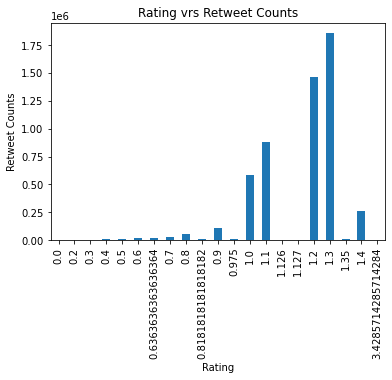

In [220]:
final_df.groupby('rating')['retweet_count'].sum().plot(kind='bar', title = 'Rating vrs Retweet Counts', xlabel='Rating', ylabel='Retweet Counts');


### Proving Insights with Data

#### Insight 1

In [221]:
# Data used for insight was from the dog_stage and retweet_count column
final_df.groupby('dog_stage')['retweet_count'].sum()

dog_stage
Can't Classify    4194722
doggo              439924
doggo, floofer       3433
doggo, pupper       55331
doggo, puppo        19196
floofer             34781
pupper             438997
puppo              139387
Name: retweet_count, dtype: int64

#### Insight  2

In [222]:
# Data used was from the source column
final_df.source.value_counts()

Twitter for iPhone    1718
Twitter Web Client      23
TweetDeck                9
Name: source, dtype: int64

#### Insight 3

In [223]:
# Data used for insight was from the dog_stage and rating_numerator column
final_df.groupby('dog_stage')['rating'].sum()

dog_stage
Can't Classify    1599.734117
doggo               68.300000
doggo, floofer       1.100000
doggo, pupper       11.300000
doggo, puppo         1.300000
floofer              8.400000
pupper             187.627000
puppo               26.300000
Name: rating, dtype: float64

#### Insight 4

In [224]:
#Data used for insight was from the retweet_count column
final_df.retweet_count.max()


79515

In [225]:
final_df.query('retweet_count==79515').dog_stage

753    doggo
Name: dog_stage, dtype: category
Categories (8, object): ['Can't Classify', 'doggo', 'doggo, floofer', 'doggo, pupper', 'doggo, puppo', 'floofer', 'pupper', 'puppo']

#### Insight 5

In [226]:
# Data used for this insight and visualization was from the rating_numerator and retweet column
final_df.groupby('rating')['retweet_count'].sum()

rating
0.000000       3443
0.200000       4771
0.300000       5432
0.400000       7185
0.500000      10933
0.600000      18856
0.636364      15043
0.700000      27267
0.800000      53573
0.818182       9220
0.900000     112945
0.975000       7069
1.000000     581640
1.100000     876454
1.126000        542
1.127000       1885
1.200000    1461743
1.300000    1857394
1.350000      10407
1.400000     258314
3.428571       1655
Name: retweet_count, dtype: int64